In [10]:
import pandas as pd

In [ ]:
# To prevent sys.path append, first run ln -s ../source from this forder
!ln -s ../source

In [2]:
from source.input_output import InputLeafData

In [3]:
station_data = InputLeafData('../datasets', 'station_data.xlsx').get_data()

In [4]:
station_data.head()

,datetime,air_temp_mean,air_temp_max,air_temp_min,dew_point_mean,dew_point_min,solar_radiation_mean,VPD_mean,VPD_min,air_humidity_mean,...,wind_speed_mean,wind_speed_max,soil_humidity_mean,soil_temp_mean,soil_temp_max,soil_temp_min,solar_panel_last,AKB_last,AKB2_last,ETo
0,2020-08-31 19:00:00,19.74,19.82,19.68,16.7,16.3,115,0.38,0.35,82.98,...,1.0,1.2,36.57,19.2,21.2,18.0,9058,6784,3643,NaN
1,2020-08-31 18:00:00,20.18,20.60,19.76,17.5,16.5,122,0.35,0.32,84.70,...,0.7,1.2,36.58,18.3,19.4,17.2,9298,6793,3643,NaN
2,2020-08-31 17:00:00,20.57,21.09,20.33,17.3,16.8,198,0.44,0.35,81.72,...,0.7,1.1,36.63,18.5,19.5,17.2,8349,6787,3643,NaN
3,2020-08-31 16:00:00,21.45,22.13,21.08,17.4,16.7,384,0.56,0.45,78.11,...,0.6,0.9,36.68,18.5,19.5,17.2,9125,6778,3643,NaN
4,2020-08-31 15:00:00,20.61,21.07,20.24,16.5,16.0,319,0.53,0.47,77.81,...,0.8,1.3,36.75,19.0,21.1,17.1,9605,6770,3643,NaN


# Nulls

In [5]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 24 columns):
datetime                3649 non-null object
air_temp_mean           3649 non-null float64
air_temp_max            3649 non-null float64
air_temp_min            3649 non-null float64
dew_point_mean          3649 non-null float64
dew_point_min           3649 non-null float64
solar_radiation_mean    3649 non-null int64
VPD_mean                3649 non-null float64
VPD_min                 3649 non-null float64
air_humidity_mean       3649 non-null float64
air_humidity_max        3649 non-null float64
air_humidity_min        3649 non-null float64
precipitation           3649 non-null float64
leaf_humidity_min       3649 non-null int64
wind_speed_mean         3649 non-null float64
wind_speed_max          3649 non-null float64
soil_humidity_mean      3649 non-null float64
soil_temp_mean          3649 non-null float64
soil_temp_max           3649 non-null float64
soil_temp_min           

# Features Explore

EDA at result_from_attendee.ipynb

# Target

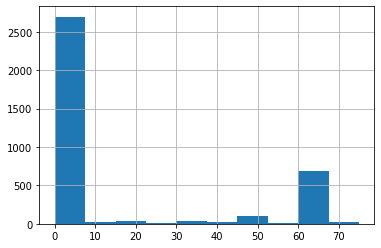

In [6]:
station_data['leaf_humidity_min'].hist()

In [7]:
station_data['leaf_humidity_min'].value_counts()

0     2669
60     690
45      82
5       28
30      25
75      23
40      22
10      20
15      17
35      15
25      15
20      15
50      14
55      13
70       1
Name: leaf_humidity_min, dtype: int64

Значения идут с шагом в 5 минут. Измерения каждый час. Подозрительное знaчение 75.

In [8]:
station_data[station_data['leaf_humidity_min'] == 75].head().index

Int64Index([1626, 1629, 1695, 1697, 1707], dtype='int64')

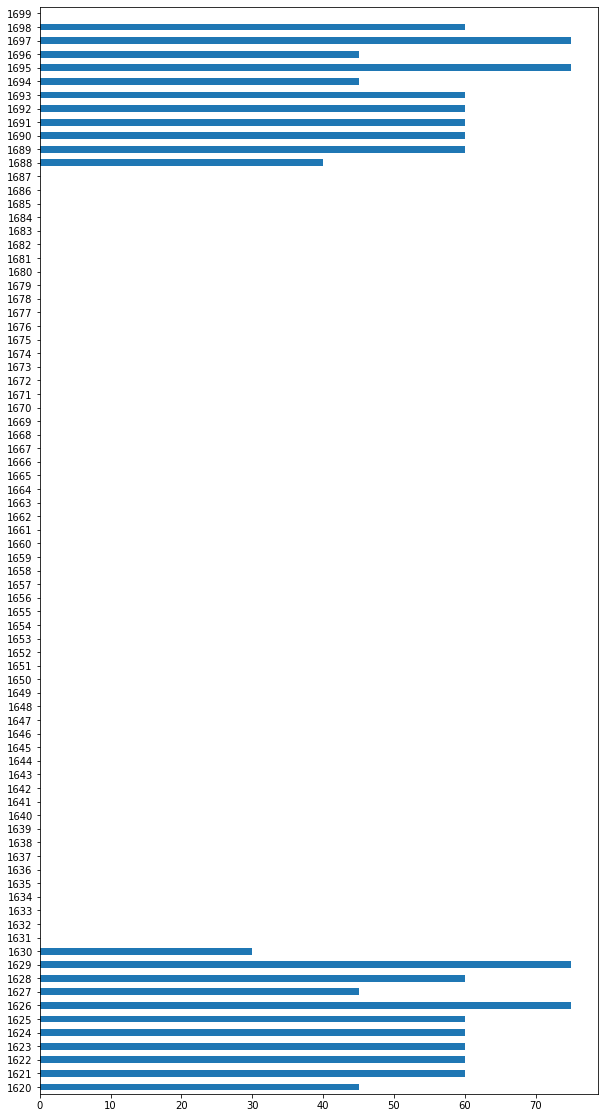

In [9]:
station_data[1620:1700]['leaf_humidity_min'].plot(kind='barh', figsize=(10, 20))

Если посмотреть на значения ближе - 75 выглядит как задержка отправки данных. После него следует 45.

Значения влажности идут сериями (промежуточные значения 60) - поэтому возможно задачу стоит поставить как предсказание начала влажности листа и продолжительности влажности в минутах.